# ANN Model

In [24]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
path = './archive'

kc_data = pd.read_csv(path + '/kc_preprocessed.csv')
kc_data = kc_data.drop(['Unnamed: 0'], axis = 1)



In [26]:
columns = kc_data.columns

result = kc_data.copy()
for feature_name in columns:
    max_value = kc_data[feature_name].max()
    min_value = kc_data[feature_name].min()
    result[feature_name] = (kc_data[feature_name] - min_value) / (max_value - min_value)

kc_data = result

In [28]:
target = kc_data['price']
data = kc_data.drop(['price'], axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [30]:
NN_model = Sequential()
NN_model.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100,activation='sigmoid'))

NN_model.add(Dense(100, activation='sigmoid'))

NN_model.add(Dense(50, activation='sigmoid'))



# The Output Layer :
NN_model.add(Dense(1,))

# Compile the network :
opt = SGD(learning_rate=0.001, momentum=1)
# opt = Adam(learning_rate=  0.001)
NN_model.compile(loss ='mean_squared_error', optimizer='RMSprop',)
NN_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 17)                306       
                                                                 
 dense_431 (Dense)           (None, 100)               1800      
                                                                 
 dense_432 (Dense)           (None, 100)               10100     
                                                                 
 dense_433 (Dense)           (None, 50)                5050      
                                                                 
 dense_434 (Dense)           (None, 1)                 51        
                                                                 
Total params: 17,307
Trainable params: 17,307
Non-trainable params: 0
_________________________________________________________________


In [31]:
Models = []

for i in range(0,5):
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))
    NN.add(Dense(10,activation='sigmoid'))
    NN.add(Dense(5, activation='sigmoid'))
    for j in range(i):
        NN.add(Dense(5, activation='sigmoid'))
        
    NN.add(Dense(1,))
    NN.compile(loss ='mean_squared_error', optimizer='RMSprop',)

    Models.append(NN)
    
        

    

training model:
training model:
training model:
training model:
training model:


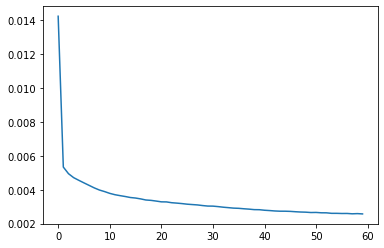

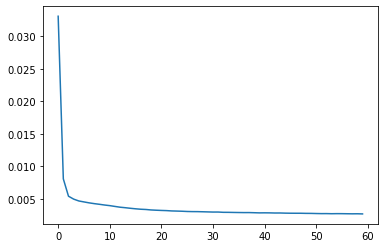

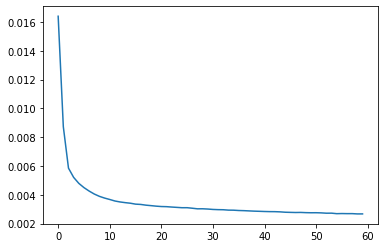

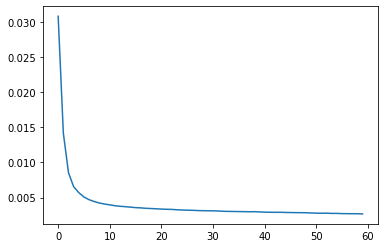

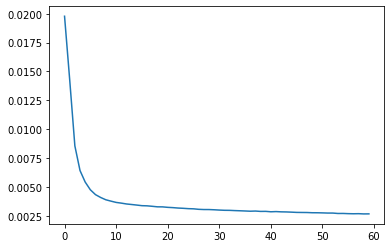

In [32]:

for model in Models:
    print('training model:')
    
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.plot(history.history['loss'],)

Epoch 1/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0162
Epoch 2/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0092
Epoch 3/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 4/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 5/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 6/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 7/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 8/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0051
Epoch 9/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0050A: 0s - loss: 
Epoch 10/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 11/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 12/150
522/522 [==============================] - 1s 1ms/step - loss: 0.0046

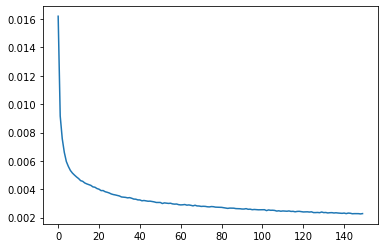

In [7]:
history = NN_model.fit(x = x_train, y = y_train, epochs=150,)

plt.plot(history.history['loss'])

In [42]:
loss = NN_model.evaluate(x_test, y_test)


131/131 [==============================] - 0s 1ms/step - loss: 0.0021


In [44]:
(NN_model.predict(x_test))

array([[0.2307888 ],
       [0.21750957],
       [0.08598602],
       ...,
       [0.4849384 ],
       [0.13985738],
       [0.17277867]], dtype=float32)

In [13]:
y = np.array(y_test).reshape(-1,1)